In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import functorch
from torch.distributions.uniform import Uniform

In [34]:
from data_generator import sine_curve

In [35]:
def generate_task():
    A = Uniform(0.5, 1.5).sample().item()
    omega = Uniform(0, 1).sample().item()
    phi = Uniform(0, np.pi).sample().item()
    return A, omega, phi

In [36]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 8),
            nn.Tanh(),
            nn.Linear(8, 8),
            nn.Tanh(),
            nn.Linear(8, 8),
            nn.Tanh(),
            nn.Linear(8, 1)
        )
    
    def forward(self, x):
        return self.fc(x)
    
def physics_informed_loss(model_output, t,omega):
    y = model_output
    # 1階微分
    dy_dt = torch.autograd.grad(y.sum(), t, create_graph=True)[0]
    # 2階微分
    d2y_dt2 = torch.autograd.grad(dy_dt.sum(), t, create_graph=True)[0]
    
    # 単振動の方程式
    
    loss = (d2y_dt2 + omega**2 * y).pow(2).mean()
    return loss

In [37]:
import matplotlib.pyplot as plt

def plot_losses(losses, mse_losses, phys_losses, epochs):
    """
    Plots the given losses over the specified number of epochs.

    Parameters:
    losses (list): List of total losses.
    mse_losses (list): List of MSE losses.
    phys_losses (list): List of physical losses.
    epochs (int): The number of epochs.
    """

    # Convert PyTorch tensors to numpy arrays if necessary
    if hasattr(losses[0], 'detach'):
        losses = [loss.detach().numpy() for loss in losses]
        mse_losses = [loss.detach().numpy() for loss in mse_losses]
        phys_losses = [loss.detach().numpy() for loss in phys_losses]

    # Create a new figure
    plt.figure()

    # Plot total losses
    plt.plot(range(1, epochs + 1), losses, label='Total Loss')

    # Plot MSE losses
    plt.plot(range(1, epochs + 1), mse_losses, label='MSE Loss')

    # Plot physical losses
    plt.plot(range(1, epochs + 1), phys_losses, label='Physical Loss')

    # Add labels and legend
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plot
    plt.show()



(1000,) (1000,) (50,) (50,)
MetaEpoc[0], Epoch [1/50], MSE Loss: 0.8209, Physics Loss: 0.0079
MetaEpoc[0], Epoch [2/50], MSE Loss: 0.8263, Physics Loss: 0.0014
MetaEpoc[0], Epoch [3/50], MSE Loss: 0.8116, Physics Loss: 0.0010
MetaEpoc[0], Epoch [4/50], MSE Loss: 0.7966, Physics Loss: 0.0040
MetaEpoc[0], Epoch [5/50], MSE Loss: 0.7875, Physics Loss: 0.0094
MetaEpoc[0], Epoch [6/50], MSE Loss: 0.7767, Physics Loss: 0.0098
MetaEpoc[0], Epoch [7/50], MSE Loss: 0.7646, Physics Loss: 0.0067
MetaEpoc[0], Epoch [8/50], MSE Loss: 0.7549, Physics Loss: 0.0046
MetaEpoc[0], Epoch [9/50], MSE Loss: 0.7446, Physics Loss: 0.0049
MetaEpoc[0], Epoch [10/50], MSE Loss: 0.7282, Physics Loss: 0.0060
MetaEpoc[0], Epoch [11/50], MSE Loss: 0.7077, Physics Loss: 0.0085
MetaEpoc[0], Epoch [12/50], MSE Loss: 0.6885, Physics Loss: 0.0131
MetaEpoc[0], Epoch [13/50], MSE Loss: 0.6694, Physics Loss: 0.0159
MetaEpoc[0], Epoch [14/50], MSE Loss: 0.6495, Physics Loss: 0.0152
MetaEpoc[0], Epoch [15/50], MSE Loss: 0.631

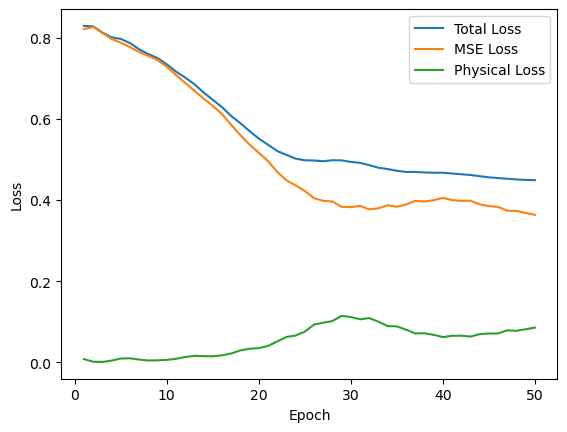

--------------
(1000,) (1000,) (50,) (50,)
MetaEpoc[1], Epoch [1/50], MSE Loss: 0.2744, Physics Loss: 0.0006
MetaEpoc[1], Epoch [2/50], MSE Loss: 0.1456, Physics Loss: 0.0008
MetaEpoc[1], Epoch [3/50], MSE Loss: 0.0796, Physics Loss: 0.0027
MetaEpoc[1], Epoch [4/50], MSE Loss: 0.0644, Physics Loss: 0.0059
MetaEpoc[1], Epoch [5/50], MSE Loss: 0.0772, Physics Loss: 0.0090
MetaEpoc[1], Epoch [6/50], MSE Loss: 0.0890, Physics Loss: 0.0104
MetaEpoc[1], Epoch [7/50], MSE Loss: 0.0880, Physics Loss: 0.0099
MetaEpoc[1], Epoch [8/50], MSE Loss: 0.0773, Physics Loss: 0.0084
MetaEpoc[1], Epoch [9/50], MSE Loss: 0.0639, Physics Loss: 0.0065
MetaEpoc[1], Epoch [10/50], MSE Loss: 0.0531, Physics Loss: 0.0049
MetaEpoc[1], Epoch [11/50], MSE Loss: 0.0476, Physics Loss: 0.0037
MetaEpoc[1], Epoch [12/50], MSE Loss: 0.0471, Physics Loss: 0.0029
MetaEpoc[1], Epoch [13/50], MSE Loss: 0.0498, Physics Loss: 0.0024
MetaEpoc[1], Epoch [14/50], MSE Loss: 0.0530, Physics Loss: 0.0022
MetaEpoc[1], Epoch [15/50], 

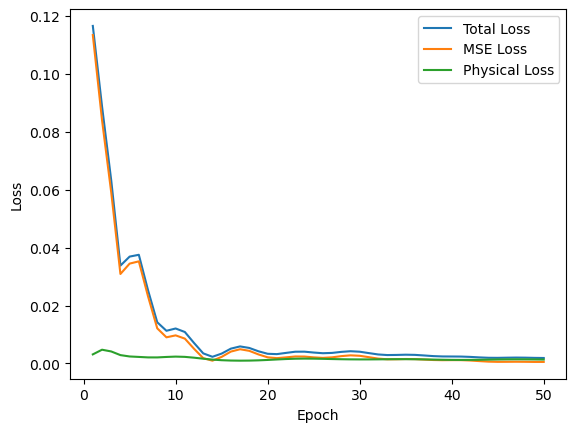

--------------
(1000,) (1000,) (50,) (50,)
MetaEpoc[101], Epoch [1/50], MSE Loss: 1.0834, Physics Loss: 0.0029
MetaEpoc[101], Epoch [2/50], MSE Loss: 0.8641, Physics Loss: 0.0192
MetaEpoc[101], Epoch [3/50], MSE Loss: 0.7695, Physics Loss: 0.0318
MetaEpoc[101], Epoch [4/50], MSE Loss: 0.6436, Physics Loss: 0.0262
MetaEpoc[101], Epoch [5/50], MSE Loss: 0.5298, Physics Loss: 0.0161
MetaEpoc[101], Epoch [6/50], MSE Loss: 0.4666, Physics Loss: 0.0120
MetaEpoc[101], Epoch [7/50], MSE Loss: 0.4153, Physics Loss: 0.0156
MetaEpoc[101], Epoch [8/50], MSE Loss: 0.3412, Physics Loss: 0.0232
MetaEpoc[101], Epoch [9/50], MSE Loss: 0.2786, Physics Loss: 0.0351
MetaEpoc[101], Epoch [10/50], MSE Loss: 0.2539, Physics Loss: 0.0496
MetaEpoc[101], Epoch [11/50], MSE Loss: 0.2386, Physics Loss: 0.0600
MetaEpoc[101], Epoch [12/50], MSE Loss: 0.2150, Physics Loss: 0.0639
MetaEpoc[101], Epoch [13/50], MSE Loss: 0.2065, Physics Loss: 0.0660
MetaEpoc[101], Epoch [14/50], MSE Loss: 0.2184, Physics Loss: 0.0703


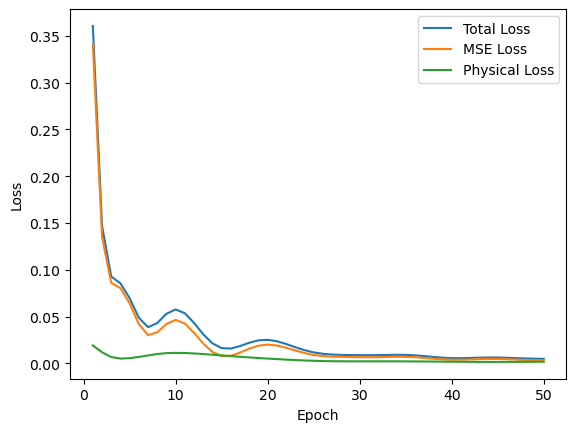

--------------
(1000,) (1000,) (50,) (50,)
MetaEpoc[201], Epoch [1/50], MSE Loss: 1.2253, Physics Loss: 0.0111
MetaEpoc[201], Epoch [2/50], MSE Loss: 0.9398, Physics Loss: 0.0071
MetaEpoc[201], Epoch [3/50], MSE Loss: 0.7684, Physics Loss: 0.0076
MetaEpoc[201], Epoch [4/50], MSE Loss: 0.6225, Physics Loss: 0.0087
MetaEpoc[201], Epoch [5/50], MSE Loss: 0.4783, Physics Loss: 0.0089
MetaEpoc[201], Epoch [6/50], MSE Loss: 0.3496, Physics Loss: 0.0091
MetaEpoc[201], Epoch [7/50], MSE Loss: 0.2522, Physics Loss: 0.0106
MetaEpoc[201], Epoch [8/50], MSE Loss: 0.1911, Physics Loss: 0.0141
MetaEpoc[201], Epoch [9/50], MSE Loss: 0.1577, Physics Loss: 0.0183
MetaEpoc[201], Epoch [10/50], MSE Loss: 0.1385, Physics Loss: 0.0223
MetaEpoc[201], Epoch [11/50], MSE Loss: 0.1251, Physics Loss: 0.0254
MetaEpoc[201], Epoch [12/50], MSE Loss: 0.1149, Physics Loss: 0.0278
MetaEpoc[201], Epoch [13/50], MSE Loss: 0.1071, Physics Loss: 0.0294
MetaEpoc[201], Epoch [14/50], MSE Loss: 0.1002, Physics Loss: 0.0302


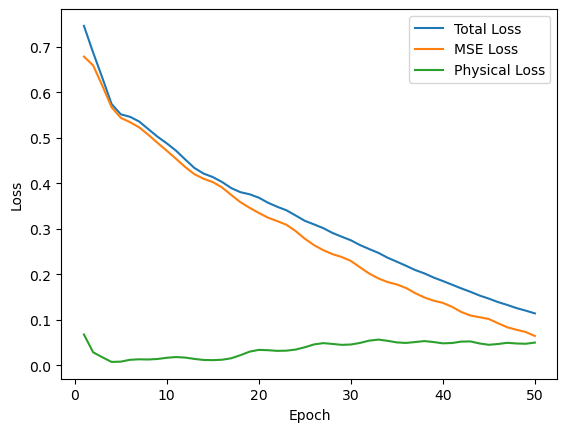

--------------
(1000,) (1000,) (50,) (50,)
MetaEpoc[301], Epoch [1/50], MSE Loss: 0.2272, Physics Loss: 0.0122
MetaEpoc[301], Epoch [2/50], MSE Loss: 0.0686, Physics Loss: 0.0081
MetaEpoc[301], Epoch [3/50], MSE Loss: 0.0641, Physics Loss: 0.0139
MetaEpoc[301], Epoch [4/50], MSE Loss: 0.0844, Physics Loss: 0.0184
MetaEpoc[301], Epoch [5/50], MSE Loss: 0.0700, Physics Loss: 0.0174
MetaEpoc[301], Epoch [6/50], MSE Loss: 0.0424, Physics Loss: 0.0139
MetaEpoc[301], Epoch [7/50], MSE Loss: 0.0272, Physics Loss: 0.0106
MetaEpoc[301], Epoch [8/50], MSE Loss: 0.0321, Physics Loss: 0.0089
MetaEpoc[301], Epoch [9/50], MSE Loss: 0.0451, Physics Loss: 0.0082
MetaEpoc[301], Epoch [10/50], MSE Loss: 0.0499, Physics Loss: 0.0077
MetaEpoc[301], Epoch [11/50], MSE Loss: 0.0418, Physics Loss: 0.0070
MetaEpoc[301], Epoch [12/50], MSE Loss: 0.0280, Physics Loss: 0.0066
MetaEpoc[301], Epoch [13/50], MSE Loss: 0.0171, Physics Loss: 0.0068
MetaEpoc[301], Epoch [14/50], MSE Loss: 0.0135, Physics Loss: 0.0077


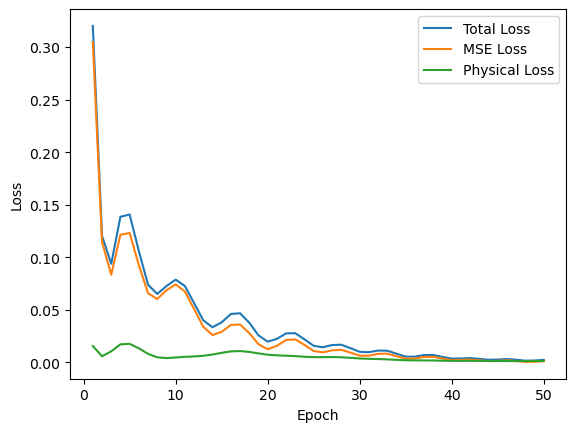

--------------
(1000,) (1000,) (50,) (50,)
MetaEpoc[401], Epoch [1/50], MSE Loss: 0.1583, Physics Loss: 0.0193
MetaEpoc[401], Epoch [2/50], MSE Loss: 0.0934, Physics Loss: 0.0059
MetaEpoc[401], Epoch [3/50], MSE Loss: 0.1048, Physics Loss: 0.0067
MetaEpoc[401], Epoch [4/50], MSE Loss: 0.0905, Physics Loss: 0.0048
MetaEpoc[401], Epoch [5/50], MSE Loss: 0.0732, Physics Loss: 0.0031
MetaEpoc[401], Epoch [6/50], MSE Loss: 0.0688, Physics Loss: 0.0044
MetaEpoc[401], Epoch [7/50], MSE Loss: 0.0609, Physics Loss: 0.0061
MetaEpoc[401], Epoch [8/50], MSE Loss: 0.0434, Physics Loss: 0.0062
MetaEpoc[401], Epoch [9/50], MSE Loss: 0.0289, Physics Loss: 0.0059
MetaEpoc[401], Epoch [10/50], MSE Loss: 0.0286, Physics Loss: 0.0064
MetaEpoc[401], Epoch [11/50], MSE Loss: 0.0324, Physics Loss: 0.0074
MetaEpoc[401], Epoch [12/50], MSE Loss: 0.0260, Physics Loss: 0.0082
MetaEpoc[401], Epoch [13/50], MSE Loss: 0.0159, Physics Loss: 0.0091
MetaEpoc[401], Epoch [14/50], MSE Loss: 0.0120, Physics Loss: 0.0104


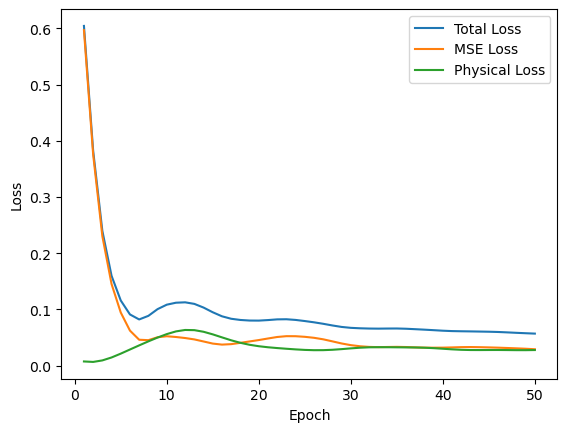

--------------
(1000,) (1000,) (50,) (50,)
MetaEpoc[501], Epoch [1/50], MSE Loss: 0.7071, Physics Loss: 0.0041
MetaEpoc[501], Epoch [2/50], MSE Loss: 0.3746, Physics Loss: 0.0048
MetaEpoc[501], Epoch [3/50], MSE Loss: 0.1628, Physics Loss: 0.0059
MetaEpoc[501], Epoch [4/50], MSE Loss: 0.0589, Physics Loss: 0.0074
MetaEpoc[501], Epoch [5/50], MSE Loss: 0.0329, Physics Loss: 0.0092
MetaEpoc[501], Epoch [6/50], MSE Loss: 0.0454, Physics Loss: 0.0104
MetaEpoc[501], Epoch [7/50], MSE Loss: 0.0647, Physics Loss: 0.0105
MetaEpoc[501], Epoch [8/50], MSE Loss: 0.0752, Physics Loss: 0.0097
MetaEpoc[501], Epoch [9/50], MSE Loss: 0.0736, Physics Loss: 0.0085
MetaEpoc[501], Epoch [10/50], MSE Loss: 0.0628, Physics Loss: 0.0072
MetaEpoc[501], Epoch [11/50], MSE Loss: 0.0475, Physics Loss: 0.0059
MetaEpoc[501], Epoch [12/50], MSE Loss: 0.0328, Physics Loss: 0.0048
MetaEpoc[501], Epoch [13/50], MSE Loss: 0.0223, Physics Loss: 0.0039
MetaEpoc[501], Epoch [14/50], MSE Loss: 0.0176, Physics Loss: 0.0031


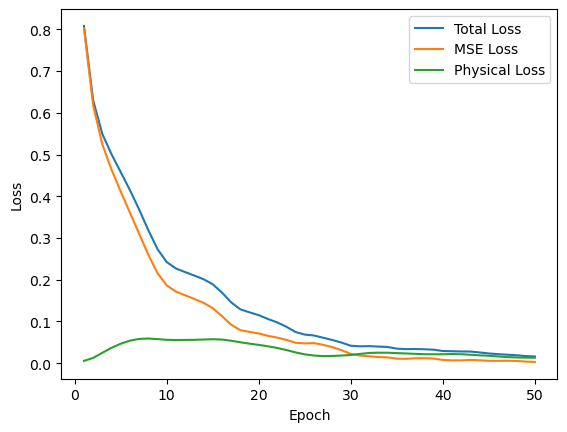

--------------
(1000,) (1000,) (50,) (50,)
MetaEpoc[601], Epoch [1/50], MSE Loss: 0.0828, Physics Loss: 0.0067
MetaEpoc[601], Epoch [2/50], MSE Loss: 0.0251, Physics Loss: 0.0078
MetaEpoc[601], Epoch [3/50], MSE Loss: 0.0312, Physics Loss: 0.0085
MetaEpoc[601], Epoch [4/50], MSE Loss: 0.0297, Physics Loss: 0.0071
MetaEpoc[601], Epoch [5/50], MSE Loss: 0.0188, Physics Loss: 0.0050
MetaEpoc[601], Epoch [6/50], MSE Loss: 0.0111, Physics Loss: 0.0033
MetaEpoc[601], Epoch [7/50], MSE Loss: 0.0095, Physics Loss: 0.0022
MetaEpoc[601], Epoch [8/50], MSE Loss: 0.0107, Physics Loss: 0.0016
MetaEpoc[601], Epoch [9/50], MSE Loss: 0.0118, Physics Loss: 0.0012
MetaEpoc[601], Epoch [10/50], MSE Loss: 0.0121, Physics Loss: 0.0011
MetaEpoc[601], Epoch [11/50], MSE Loss: 0.0117, Physics Loss: 0.0011
MetaEpoc[601], Epoch [12/50], MSE Loss: 0.0108, Physics Loss: 0.0013
MetaEpoc[601], Epoch [13/50], MSE Loss: 0.0091, Physics Loss: 0.0014
MetaEpoc[601], Epoch [14/50], MSE Loss: 0.0069, Physics Loss: 0.0014


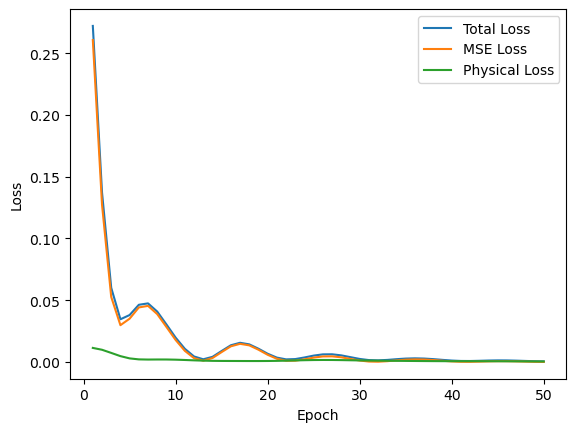

--------------
(1000,) (1000,) (50,) (50,)
MetaEpoc[701], Epoch [1/50], MSE Loss: 0.4853, Physics Loss: 0.0097
MetaEpoc[701], Epoch [2/50], MSE Loss: 0.3047, Physics Loss: 0.0029
MetaEpoc[701], Epoch [3/50], MSE Loss: 0.2041, Physics Loss: 0.0018
MetaEpoc[701], Epoch [4/50], MSE Loss: 0.1586, Physics Loss: 0.0053
MetaEpoc[701], Epoch [5/50], MSE Loss: 0.1364, Physics Loss: 0.0101
MetaEpoc[701], Epoch [6/50], MSE Loss: 0.1094, Physics Loss: 0.0131
MetaEpoc[701], Epoch [7/50], MSE Loss: 0.0775, Physics Loss: 0.0153
MetaEpoc[701], Epoch [8/50], MSE Loss: 0.0552, Physics Loss: 0.0195
MetaEpoc[701], Epoch [9/50], MSE Loss: 0.0437, Physics Loss: 0.0247
MetaEpoc[701], Epoch [10/50], MSE Loss: 0.0326, Physics Loss: 0.0272
MetaEpoc[701], Epoch [11/50], MSE Loss: 0.0205, Physics Loss: 0.0264
MetaEpoc[701], Epoch [12/50], MSE Loss: 0.0150, Physics Loss: 0.0258
MetaEpoc[701], Epoch [13/50], MSE Loss: 0.0167, Physics Loss: 0.0273
MetaEpoc[701], Epoch [14/50], MSE Loss: 0.0157, Physics Loss: 0.0295


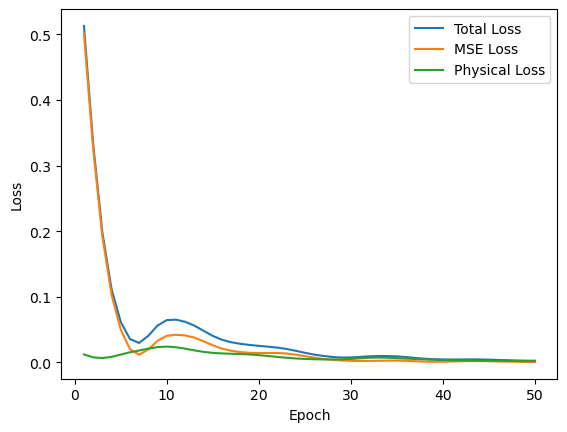

--------------
(1000,) (1000,) (50,) (50,)
MetaEpoc[801], Epoch [1/50], MSE Loss: 1.0144, Physics Loss: 0.0108
MetaEpoc[801], Epoch [2/50], MSE Loss: 0.6742, Physics Loss: 0.0090
MetaEpoc[801], Epoch [3/50], MSE Loss: 0.4347, Physics Loss: 0.0067
MetaEpoc[801], Epoch [4/50], MSE Loss: 0.2855, Physics Loss: 0.0078
MetaEpoc[801], Epoch [5/50], MSE Loss: 0.1944, Physics Loss: 0.0100
MetaEpoc[801], Epoch [6/50], MSE Loss: 0.1316, Physics Loss: 0.0115
MetaEpoc[801], Epoch [7/50], MSE Loss: 0.0839, Physics Loss: 0.0119
MetaEpoc[801], Epoch [8/50], MSE Loss: 0.0491, Physics Loss: 0.0115
MetaEpoc[801], Epoch [9/50], MSE Loss: 0.0291, Physics Loss: 0.0109
MetaEpoc[801], Epoch [10/50], MSE Loss: 0.0235, Physics Loss: 0.0106
MetaEpoc[801], Epoch [11/50], MSE Loss: 0.0256, Physics Loss: 0.0111
MetaEpoc[801], Epoch [12/50], MSE Loss: 0.0280, Physics Loss: 0.0124
MetaEpoc[801], Epoch [13/50], MSE Loss: 0.0292, Physics Loss: 0.0143
MetaEpoc[801], Epoch [14/50], MSE Loss: 0.0324, Physics Loss: 0.0166


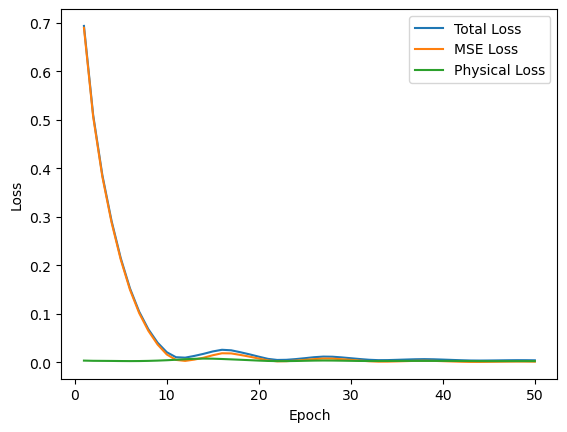

--------------
(1000,) (1000,) (50,) (50,)
MetaEpoc[901], Epoch [1/50], MSE Loss: 0.9981, Physics Loss: 0.0783
MetaEpoc[901], Epoch [2/50], MSE Loss: 0.8398, Physics Loss: 0.0514
MetaEpoc[901], Epoch [3/50], MSE Loss: 0.7242, Physics Loss: 0.0495
MetaEpoc[901], Epoch [4/50], MSE Loss: 0.6395, Physics Loss: 0.0548
MetaEpoc[901], Epoch [5/50], MSE Loss: 0.5750, Physics Loss: 0.0568
MetaEpoc[901], Epoch [6/50], MSE Loss: 0.5239, Physics Loss: 0.0524
MetaEpoc[901], Epoch [7/50], MSE Loss: 0.4837, Physics Loss: 0.0438
MetaEpoc[901], Epoch [8/50], MSE Loss: 0.4542, Physics Loss: 0.0347
MetaEpoc[901], Epoch [9/50], MSE Loss: 0.4356, Physics Loss: 0.0282
MetaEpoc[901], Epoch [10/50], MSE Loss: 0.4257, Physics Loss: 0.0251
MetaEpoc[901], Epoch [11/50], MSE Loss: 0.4200, Physics Loss: 0.0241
MetaEpoc[901], Epoch [12/50], MSE Loss: 0.4132, Physics Loss: 0.0245
MetaEpoc[901], Epoch [13/50], MSE Loss: 0.4017, Physics Loss: 0.0263
MetaEpoc[901], Epoch [14/50], MSE Loss: 0.3846, Physics Loss: 0.0293


In [38]:
# 訓練ループ
model = SimpleModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for meta_epoch in range(1000):
    A, omega, phi = generate_task()
    model_temp = SimpleModel()
    model_temp.load_state_dict(model.state_dict())
    optimizer_temp = optim.Adam(model_temp.parameters(), lr=0.01)

    temp_sine = sine_curve(A,omega,phi,1000)

    #メタ学習時のサンプル数は5を仮定
    t,y,random_samples, random_samples_y = temp_sine.random_samples(50)
    t_tensor = torch.tensor(t, dtype=torch.float32, requires_grad=True).view(-1, 1)
    y_tensor = torch.tensor(y, dtype=torch.float32, requires_grad=True).view(-1, 1)

    random_samples_y_tensor = torch.tensor(random_samples_y, dtype=torch.float32, requires_grad=True).view(-1, 1)
    random_samples_tensor = torch.tensor(random_samples, dtype=torch.float32, requires_grad=True).view(-1, 1)
    
    epochs = 50
    print(t.shape,y.shape,random_samples.shape, random_samples_y.shape)

    #10メタエポックごとに損失が下がっていく様子をプロットしておく。
    losses = []
    mse_losses = []
    phys_losses = []

    #y_pred = model_temp(random_samples_tensor)
    #print(random_samples_tensor.shape,y_pred.shape)

    for epoch in range(epochs):
        optimizer_temp.zero_grad()
        #print(random_samples_y.shape)  # これは (5,) または (5,1) であるべきです
        #print(random_samples_y_tensor.shape)  # これは torch.Size([5, 1]) であるべきです
        y_pred = model_temp(random_samples_tensor)
        mse_loss = criterion(y_pred, random_samples_y_tensor)
        phys_loss = physics_informed_loss(y_pred, random_samples_tensor,omega)
        
        
    
    # 合成損失
        loss = mse_loss + phys_loss
        losses.append(loss)
        mse_losses.append(mse_loss)
        phys_losses.append(phys_loss)
        loss.backward()
        optimizer_temp.step()
        
        
        print(f'MetaEpoc[{meta_epoch}], Epoch [{epoch+1}/{epochs}], MSE Loss: {mse_loss.item():.4f}, Physics Loss: {phys_loss.item():.4f}')
    #ついに初期値thetaを変更 
    beta = 0.05
    theta = {name: param for name, param in model.named_parameters()}
    phi = {name: param for name, param in model_temp.named_parameters()}

    # REPTILEの更新式に従って theta を更新
    for name in theta:
        theta[name].data = (1 - beta) * theta[name].data + beta * phi[name].data
    #REPTILEでバッチ処理?
    if meta_epoch % 100 == 0:
        plot_losses(losses, mse_losses, phys_losses, epochs)


    # 更新された theta を model にロード
    model.load_state_dict(theta)
    print("--------------")


In [39]:
#初期位相
omega = 5

# データセットのパラメータ
t_points = 1000
t = np.linspace(0, 10, t_points)

y = np.sin(t+omega)

num_samples =7
random_indices = np.random.choice(t_points, num_samples, replace=False)
# 対応するデータ点を取得
random_samples = t[random_indices]
random_samples_y = np.sin(random_samples+omega)


# データをTensorに変換
t_tensor = torch.tensor(t, dtype=torch.float32, requires_grad=True).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32, requires_grad=True).view(-1, 1)

random_samples_y_tensor = torch.tensor(random_samples_y, dtype=torch.float32, requires_grad=True).view(-1, 1)
random_samples_tensor = torch.tensor(random_samples, dtype=torch.float32, requires_grad=True).view(-1, 1)

In [40]:

epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(random_samples_tensor)
    mse_loss = criterion(y_pred, random_samples_y_tensor)
    phys_loss = physics_informed_loss(y_pred, random_samples_tensor,1)
    
    # 合成損失
    loss = mse_loss + phys_loss
    
    loss.backward()
    optimizer.step()
    list_epochs=[]
    list_mse_loss = []
    list_phys_loss = []
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], MSE Loss: {mse_loss.item():.4f}, Physics Loss: {phys_loss.item():.4f}')


Epoch [100/100], MSE Loss: 0.0003, Physics Loss: 0.0006


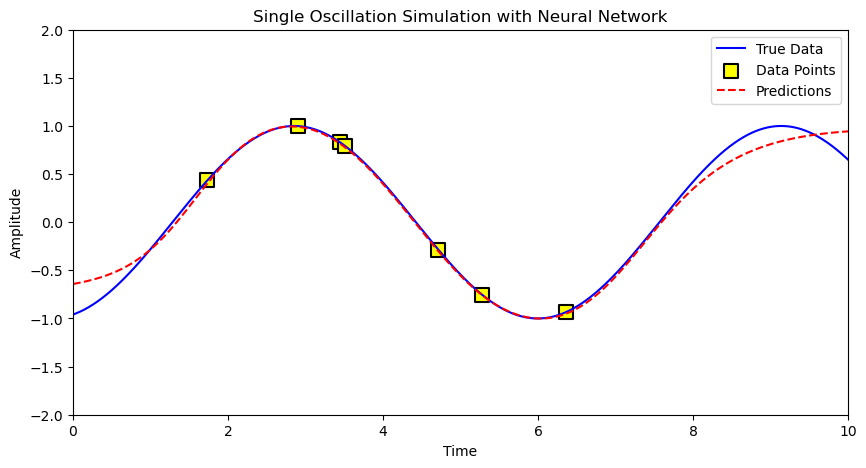

In [41]:
plt.figure(figsize=(10, 5))


plt.plot(t, y, label='True Data', color='blue')
plt.scatter(random_samples, random_samples_y, label='Data Points', color='yellow', s=100, marker='s', edgecolor='black', linewidths=1.5)
plt.plot(t, model(t_tensor).detach().numpy(), label='Predictions', color='red', linestyle='--')
plt.xlim(0,10)
plt.ylim(-2,2)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Single Oscillation Simulation with Neural Network')
plt.show()

## PINNs

In [42]:
# 訓練ループ
model = SimpleModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(random_samples_tensor)
    mse_loss = criterion(y_pred, random_samples_y_tensor)
    phys_loss = physics_informed_loss(y_pred, random_samples_tensor,1)
    
    # 合成損失
    loss = mse_loss + phys_loss
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], MSE Loss: {mse_loss.item():.4f}, Physics Loss: {phys_loss.item():.4f}')

Epoch [100/100], MSE Loss: 0.0197, Physics Loss: 0.0650


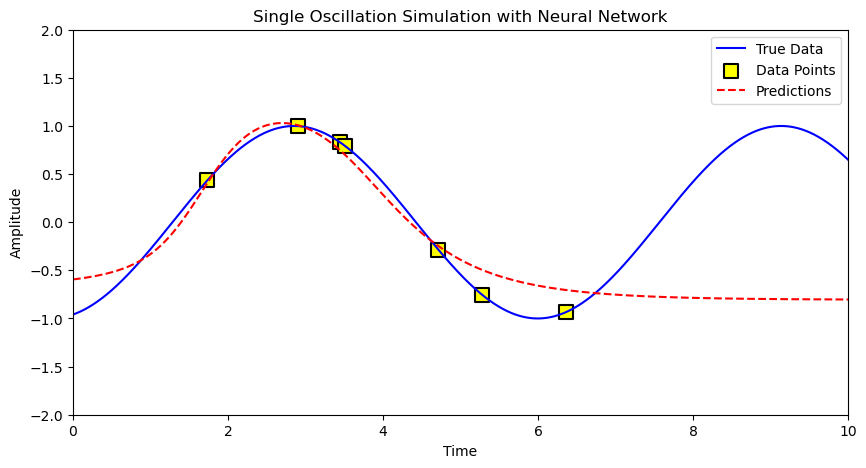

In [43]:
plt.figure(figsize=(10, 5))


plt.plot(t, y, label='True Data', color='blue')
plt.scatter(random_samples, random_samples_y, label='Data Points', color='yellow', s=100, marker='s', edgecolor='black', linewidths=1.5)
plt.plot(t, model(t_tensor).detach().numpy(), label='Predictions', color='red', linestyle='--')
plt.xlim(0,10)
plt.ylim(-2,2)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Single Oscillation Simulation with Neural Network')
plt.show()

物理損失こう

## 普通の深層学習

In [44]:
# 訓練ループ
model_ = SimpleModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_.parameters(), lr=0.01)

epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model_(random_samples_tensor)
    loss = criterion(y_pred, random_samples_y_tensor)

    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], MSE Loss: {loss.item():.4f}')

Epoch [100/100], MSE Loss: 0.0027


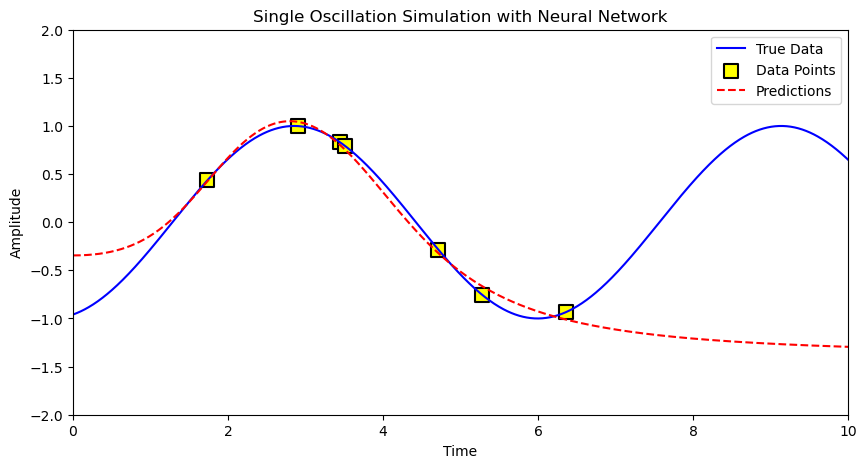

In [45]:
plt.figure(figsize=(10, 5))


plt.plot(t, y, label='True Data', color='blue')
plt.scatter(random_samples, random_samples_y, label='Data Points', color='yellow', s=100, marker='s', edgecolor='black', linewidths=1.5)
plt.plot(t, model_(t_tensor).detach().numpy(), label='Predictions', color='red', linestyle='--')
plt.xlim(0,10)
plt.ylim(-2,2)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Single Oscillation Simulation with Neural Network')
plt.show()